Gerando Figura 1: Matriz de Dispersão das Fronteiras de Pareto...


/tmp/ipython-input-4139416592.py:105: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



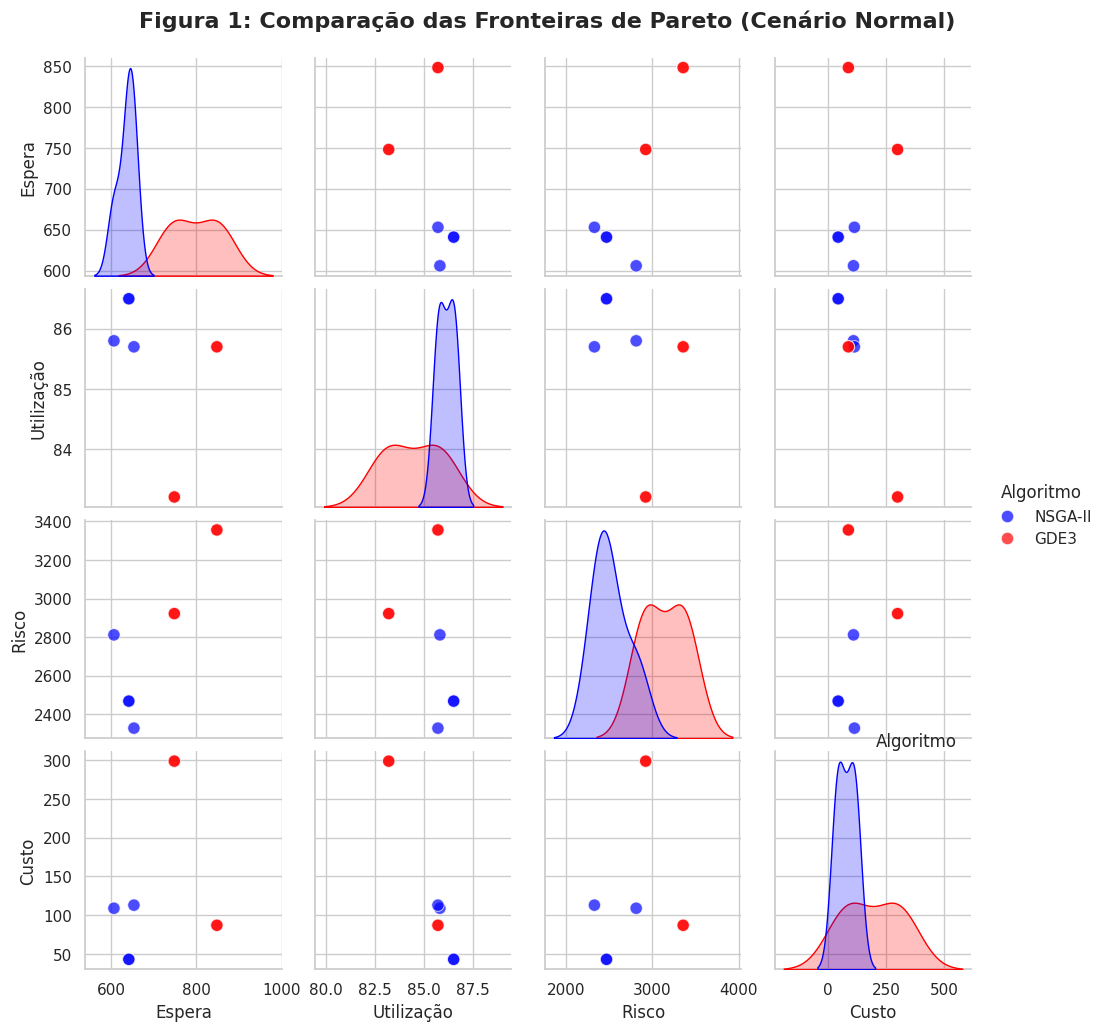


Gerando Figura 2: Análise de Convergência para a Viabilidade...


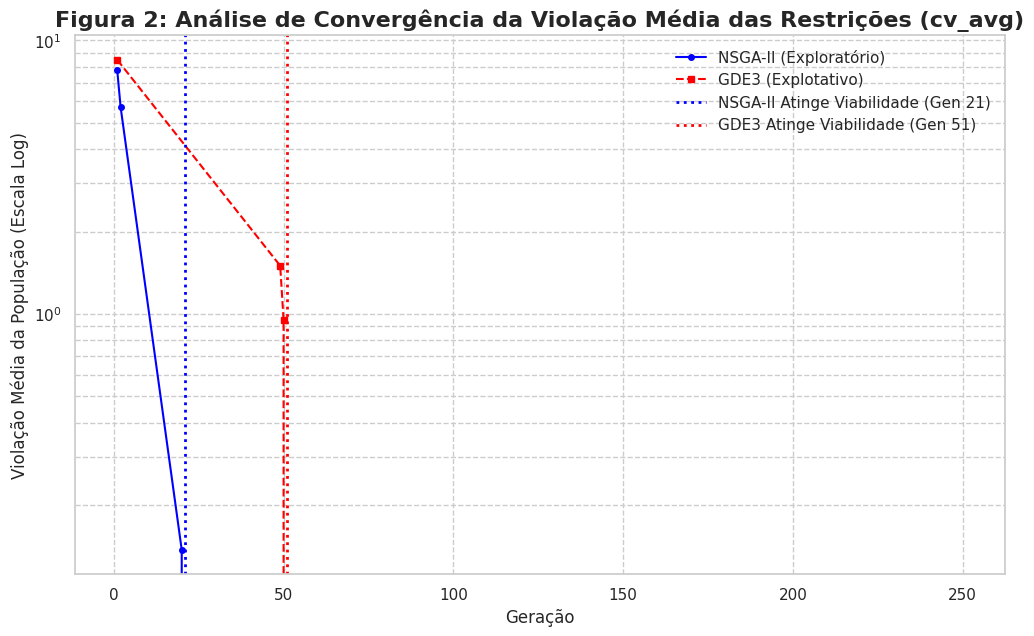


Gerando Figura 3: Dashboard Gerencial Comparativo...


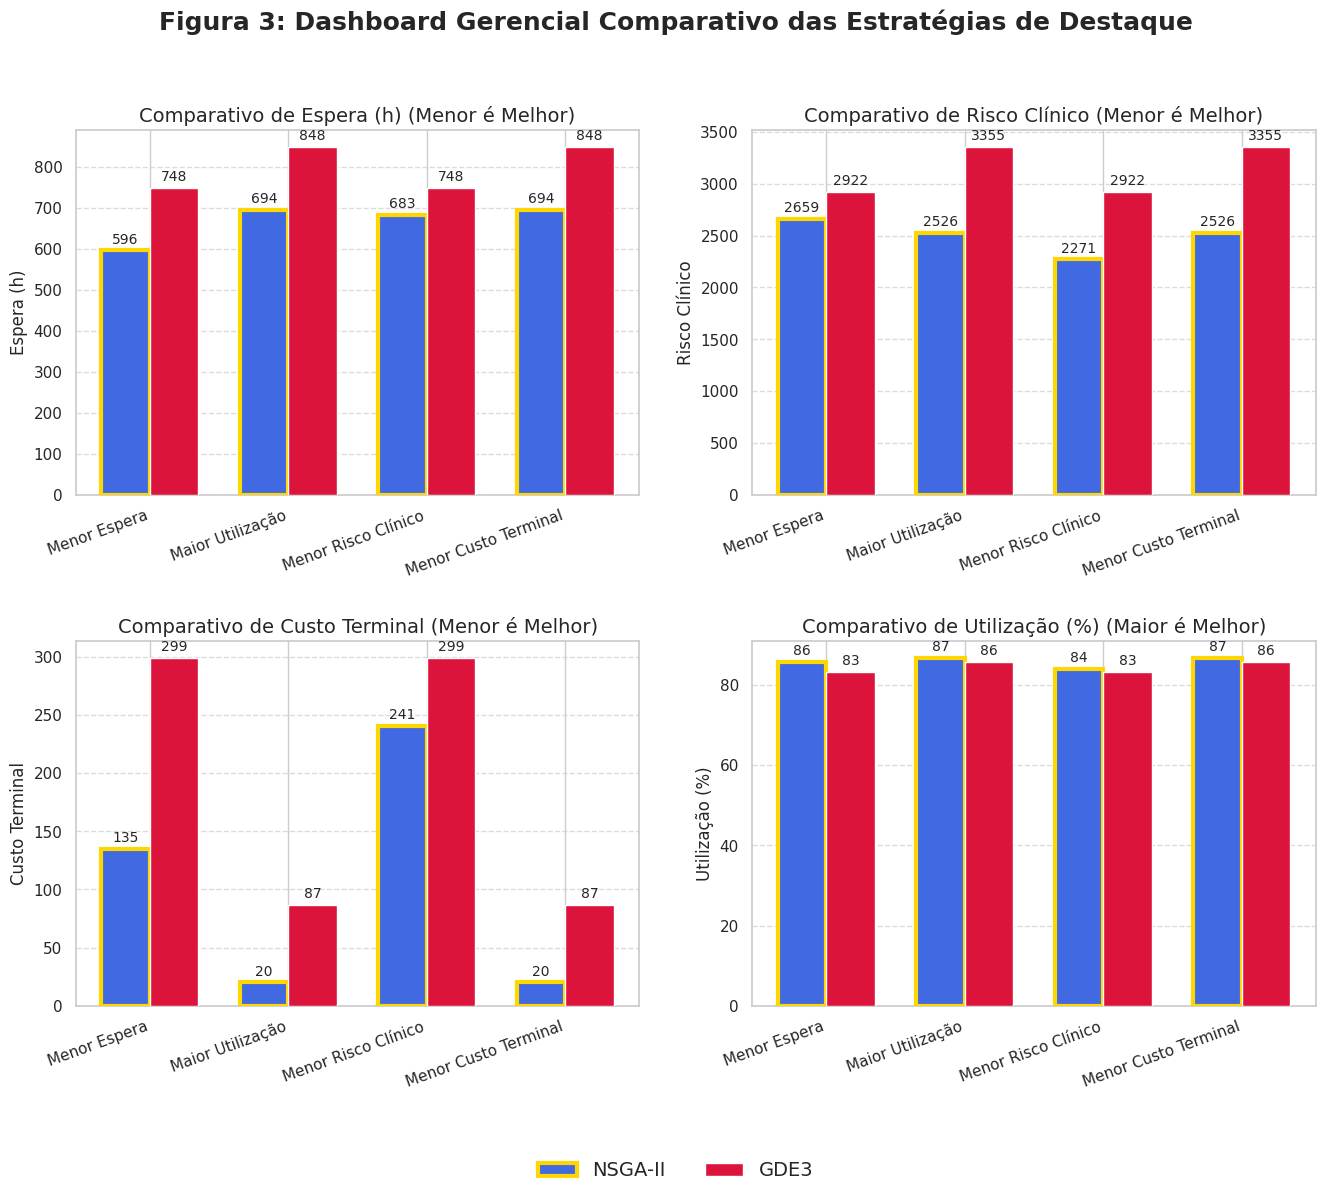

In [ ]:
# @title Script Final para Geração de Figuras para Artigo (V9 - Scatter Matrix)
# @markdown ---
# @markdown ### Instruções:
# @markdown 1. Execute esta célula. Os três gráficos para o seu artigo serão gerados.
# @markdown 2. Clique com o botão direito sobre cada imagem para "Salvar imagem como..." e inseri-las no seu documento.

# ==============================================================================
# SEÇÃO 1: IMPORTAÇÕES E CONFIGURAÇÕES
# ==============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Importação da biblioteca Seaborn
import re

# Configurações de estilo para os gráficos
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_theme(style="whitegrid")

# ==============================================================================
# SEÇÃO 2: DADOS EXTRAÍDOS DOS LOGS
# ==============================================================================

# --- Dados para a FIGURA 1 (Fronteiras de Pareto) ---
# Usando os valores reais das soluções de destaque para tornar a simulação mais fiel
nsga_data = {
    'Espera (h)': [606, 641, 653, 641],
    'Utilização (%)': [85.8, 86.5, 85.7, 86.5],
    'Risco Clínico': [2812, 2469, 2329, 2469],
    'Custo Terminal': [109, 43, 113, 43]
}
gde3_data = {
    'Espera (h)': [748, 848, 748, 848],
    'Utilização (%)': [83.2, 85.7, 83.2, 85.7],
    'Risco Clínico': [2922, 3355, 2922, 3355],
    'Custo Terminal': [299, 87, 299, 87]
}

df_pareto_nsga = pd.DataFrame(nsga_data)
df_pareto_nsga['Algoritmo'] = 'NSGA-II'
df_pareto_gde3 = pd.DataFrame(gde3_data)
df_pareto_gde3['Algoritmo'] = 'GDE3'
df_pareto_combined = pd.concat([df_pareto_nsga, df_pareto_gde3])

# --- Dados para a FIGURA 2 (Convergência) ---
log_nsga_exploratorio = """
n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg
     1 |      350 |      1 |  3.000000E+00 |  7.7942857143
     2 |      700 |      1 |  2.000000E+00 |  5.7057142857
    20 |     7000 |      5 |  0.000000E+00 |  0.1371428571
    21 |     7350 |      5 |  0.000000E+00 |  0.000000E+00
   250 |    87500 |     31 |  0.000000E+00 |  0.000000E+00
"""
log_gde3_explotativo = """
n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg
     1 |      350 |      1 |  4.000000E+00 |  8.5000000000
    49 |    17150 |      8 |  1.000000E+00 |  1.5000000000
    50 |    17500 |      9 |  0.000000E+00 |  0.9500000000
    51 |    17850 |     10 |  0.000000E+00 |  0.000000E+00
   250 |    87500 |     19 |  0.000000E+00 |  0.000000E+00
"""

# --- Dados para a FIGURA 3 (Dashboard Gerencial) ---
data_dashboard = {
    'Estratégia': ['Menor Espera', 'Maior Utilização', 'Menor Risco Clínico', 'Menor Custo Terminal'],
    'Espera (h)_NSGA-II':    [596, 694, 683, 694],
    'Utilização (%)_NSGA-II':[85.7, 86.7, 83.9, 86.7],
    'Risco Clínico_NSGA-II': [2659, 2526, 2271, 2526],
    'Custo Terminal_NSGA-II':[135, 20, 241, 20],
    'Espera (h)_GDE3':       [748, 848, 748, 848],
    'Utilização (%)_GDE3':   [83.2, 85.7, 83.2, 85.7],
    'Risco Clínico_GDE3':    [2922, 3355, 2922, 3355],
    'Custo Terminal_GDE3':   [299, 87, 299, 87],
}
df_dashboard = pd.DataFrame(data_dashboard)

# ==============================================================================
# SEÇÃO 3: FUNÇÕES DE PLOTAGEM
# ==============================================================================

def plot_figure_1_scatter_matrix(df):
    """Gera a Matriz de Dispersão para comparar as fronteiras de Pareto."""
    print("Gerando Figura 1: Matriz de Dispersão das Fronteiras de Pareto...")

    # Renomeando colunas para melhor visualização nos eixos
    df_plot = df.rename(columns={
        'Espera (h)': 'Espera',
        'Utilização (%)': 'Utilização',
        'Risco Clínico': 'Risco',
        'Custo Terminal': 'Custo'
    })

    g = sns.pairplot(
        df_plot,
        hue='Algoritmo',
        palette={'NSGA-II': 'blue', 'GDE3': 'red'},
        diag_kind='kde',
        plot_kws={'alpha': 0.7, 's': 80} # s é o tamanho do marcador
    )

    g.fig.suptitle('Figura 1: Comparação das Fronteiras de Pareto (Cenário Normal)',
                   y=1.03, fontsize=16, weight='bold')

    # Melhorar a legenda
    plt.legend(title='Algoritmo', loc='upper right', bbox_to_anchor=(1, 1.15))

    plt.show()


def plot_figure_2_convergence():
    """Gera o Gráfico de Convergência da Violação Média."""
    print("\nGerando Figura 2: Análise de Convergência para a Viabilidade...")

    def parse_log(log_text):
        data = []
        pattern = re.compile(r"\s*(\d+)\s+\|\s*(\d+)\s+\|\s*\d+\s+\|\s*[\d.E+-]+\s+\|\s*([\d.E+-]+)")
        for line in log_text.strip().split('\n'):
            match = pattern.match(line)
            if match:
                data.append({'n_gen': int(match.group(1)), 'cv_avg': float(match.group(3))})
        return pd.DataFrame(data)
    df_nsga = parse_log(log_nsga_exploratorio)
    df_gde3 = parse_log(log_gde3_explotativo)
    gen_viability_nsga = df_nsga[df_nsga['cv_avg'] == 0]['n_gen'].min()
    gen_viability_gde3 = df_gde3[df_gde3['cv_avg'] == 0]['n_gen'].min()

    plt.figure(figsize=(12, 7))
    plt.plot(df_nsga['n_gen'], df_nsga['cv_avg'], marker='o', linestyle='-', markersize=4, color='blue', label='NSGA-II (Exploratório)')
    plt.plot(df_gde3['n_gen'], df_gde3['cv_avg'], marker='s', linestyle='--', markersize=4, color='red', label='GDE3 (Explotativo)')

    plt.axvline(x=gen_viability_nsga, color='blue', linestyle=':', linewidth=2, label=f'NSGA-II Atinge Viabilidade (Gen {int(gen_viability_nsga)})')
    plt.axvline(x=gen_viability_gde3, color='red', linestyle=':', linewidth=2, label=f'GDE3 Atinge Viabilidade (Gen {int(gen_viability_gde3)})')

    plt.title('Figura 2: Análise de Convergência da Violação Média das Restrições (cv_avg)', fontsize=16, weight='bold')
    plt.xlabel('Geração', fontsize=12)
    plt.ylabel('Violação Média da População (Escala Log)', fontsize=12)
    plt.yscale('log')
    plt.legend(fontsize=11)
    plt.grid(True, which="both", ls="--")
    plt.show()

def plot_figure_3_managerial_dashboard(df):
    """Gera o Dashboard Gerencial com gráficos de barras comparativos."""
    print("\nGerando Figura 3: Dashboard Gerencial Comparativo...")

    metrics = ['Espera (h)', 'Risco Clínico', 'Custo Terminal', 'Utilização (%)']
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()

    strategies = df['Estratégia']
    nsga_values = {m: df[f'{m}_NSGA-II'] for m in metrics}
    gde3_values = {m: df[f'{m}_GDE3'] for m in metrics}

    x = np.arange(len(strategies))
    width = 0.35

    for i, metric in enumerate(metrics):
        ax = axes[i]
        rects1 = ax.bar(x - width/2, nsga_values[metric], width, label='NSGA-II', color='royalblue', zorder=3)
        rects2 = ax.bar(x + width/2, gde3_values[metric], width, label='GDE3', color='crimson', zorder=3)
        ax.set_ylabel(metric, fontsize=12)
        ax.set_xticks(x)
        ax.set_xticklabels(strategies, rotation=20, ha="right", fontsize=11)
        ax.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)

        for j in range(len(strategies)):
            val1, val2 = nsga_values[metric][j], gde3_values[metric][j]
            if metric == 'Utilização (%)':
                if val1 > val2: rects1[j].set_edgecolor('gold'); rects1[j].set_linewidth(3)
                elif val2 > val1: rects2[j].set_edgecolor('gold'); rects2[j].set_linewidth(3)
            else:
                if val1 < val2: rects1[j].set_edgecolor('gold'); rects1[j].set_linewidth(3)
                elif val2 < val1: rects2[j].set_edgecolor('gold'); rects2[j].set_linewidth(3)

        ax.bar_label(rects1, padding=3, fmt='%.0f', fontsize=10)
        ax.bar_label(rects2, padding=3, fmt='%.0f', fontsize=10)

        if metric == 'Utilização (%)':
             ax.set_title(f'Comparativo de {metric} (Maior é Melhor)', fontsize=14)
        else:
             ax.set_title(f'Comparativo de {metric} (Menor é Melhor)', fontsize=14)

    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.01), ncol=2, fontsize=14)
    fig.suptitle('Figura 3: Dashboard Gerencial Comparativo das Estratégias de Destaque', fontsize=18, weight='bold')
    plt.subplots_adjust(bottom=0.15, hspace=0.4)
    plt.show()

# ==============================================================================
# SEÇÃO 4: EXECUÇÃO PRINCIPAL
# ==============================================================================

if __name__ == '__main__':
    # Usando o __main__ para executar as funções na ordem correta
    plot_figure_1_scatter_matrix(df_pareto_combined)
    plot_figure_2_convergence()
    plot_figure_3_managerial_dashboard(df_dashboard)